In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 6]

In [59]:
# Problem statement

The Objective is to predict the car price

In [60]:
# Dataset Description

In [61]:
# Load the Dataset

In [206]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [207]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [201]:
df['fueltype']=df['fueltype'].fillna(df['fueltype'].mode())

In [205]:
df['fueltype'].value_counts()

gas       127
diesel     19
Name: fueltype, dtype: int64

In [194]:
df['fueltype'].mode()

0    gas
Name: fueltype, dtype: object

In [199]:
df=df.replace({'NaN':np.nan})

In [ ]:
# #Splitting company name from CarName column

In [ ]:
df['Company_Name' = df['CarName'].apply(lambda x : x.split(' ')[0])

In [356]:
df.shape

(205, 27)

In [286]:
df['Company_Name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Company_Name, dtype: int64

In [66]:
# Missing value Analysis

In [178]:
(df.isnull().sum()/len(df))*100

car_ID               0.000000
symboling            0.000000
CarName              0.000000
fueltype            28.780488
aspiration           0.000000
doornumber           0.000000
carbody             10.243902
drivewheel           0.000000
enginelocation      20.487805
wheelbase            0.000000
carlength            8.780488
carwidth             0.000000
carheight           18.048780
curbweight           0.000000
enginetype          25.853659
cylindernumber      10.731707
enginesize           0.000000
fuelsystem           4.878049
boreratio            0.000000
stroke               0.000000
compressionratio     0.000000
horsepower           0.000000
peakrpm              0.000000
citympg              0.000000
highwaympg           0.000000
price                0.000000
dtype: float64

<Axes: >

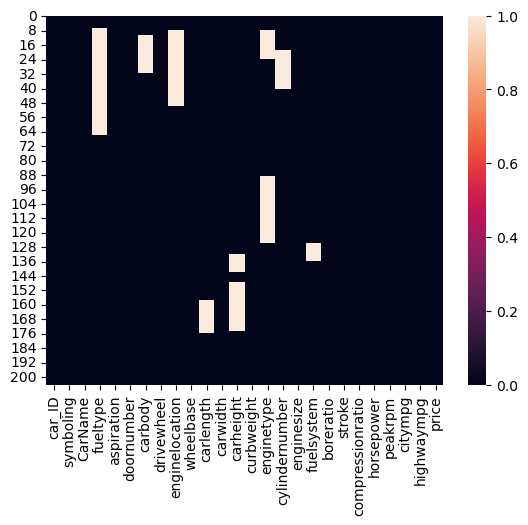

In [179]:
sns.heatmap(df.isnull())

In [69]:
#df=df.replace({' ':np.nan})

In [71]:
# missing value imputation with median and mode 

In [212]:
df_num1=df.select_dtypes(include=np.number)
df_cat1=df.select_dtypes(exclude=np.number)

In [213]:
df_cat1.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [214]:
df_num1.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [81]:
for i in df_cat1:
    df_cat[i].fillna(df_cat[i].mode())

In [82]:
for i in df_num1:
    df_num[i].fillna(df_num[i].median())

In [215]:
df_bm=pd.concat([df_num,df_cat],axis=1)
df_bm.shape

(205, 26)

<Axes: >

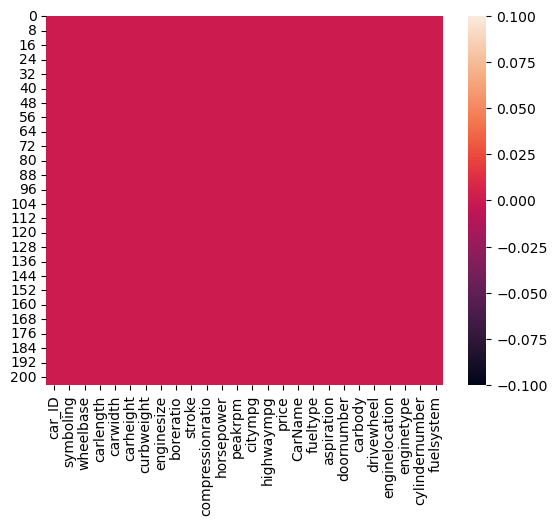

In [216]:
sns.heatmap(df_bm.isnull())

In [20]:
# Ambiguity

In [217]:
df['symboling']=df['symboling'].astype(object)

In [218]:
df['curbweight']=df['curbweight'].astype(float)

In [219]:
df['horsepower']=df['horsepower'].astype(float)

In [220]:
df['citympg']=df['citympg'].astype(float)

In [221]:
df['highwaympg']=df['highwaympg'].astype(float)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
# dataframe with all the features with null value treatment completed

In [28]:
# Base Model

# Base Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [288]:
df_bm['Company_Name']=df_bm['CarName'].apply(lambda x : x.split(' ')[0])

In [289]:
df_bm.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company_Name
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [290]:
df_bm.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'Company_Name'],
      dtype='object')

In [344]:
X=df_bm.drop(['price','car_ID'],axis=1)
X=pd.get_dummies(X,drop_first=True)
y=df_bm['price']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=1)

In [345]:
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(164, 216) (164,)
(41, 216) (41,)


In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Linear Regression Base Model

In [342]:
lr=LinearRegression()

model_bm=lr.fit(Xtrain,ytrain)
pred_test_bm_lr=model_bm.predict(Xtest) # y pred testing 
pred_train_bm=model_bm.predict(Xtrain) # x pred training
print('The R2 score test:',r2_score(ytest,pred_test_bm_lr))
print('The R2 score train:',r2_score(ytrain,pred_train_bm))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,pred_test_bm_lr)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,pred_train_bm)))

The R2 score test: 0.5309917488729703
The R2 score train: 0.9982712160508207
The RMSE score test: 5076.637739772069
The RMSE score train: 335.8661762521658


In [ ]:
# by seeing R2 score and RMSE score, we could see that the model is overfit

# Proceeding with regularization methods

In [ ]:
# Lasso

In [230]:
from sklearn.linear_model import Lasso

In [346]:
lasso=Lasso()
lasso_bm=lasso.fit(Xtrain,ytrain)
pred_test_bm_las=lasso_bm.predict(Xtest) # y pred testing 
pred_train_bm=lasso_bm.predict(Xtrain) # x pred training
print('The R2 score test:',r2_score(ytest,pred_test_bm))
print('The R2 score train:',r2_score(ytrain,pred_train_bm))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,pred_test_bm_las)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,pred_train_bm)))

The R2 score test: -3.1276089369243356e+24
The R2 score train: 0.9966419748337474
The RMSE score test: 2965.5996135487835
The RMSE score train: 468.09918222106165


In [ ]:
# by seeing R2 score and RMSE score, we could see that the lasso model is overfit

In [ ]:
# Ridge

In [233]:
from sklearn.linear_model import Ridge

In [234]:
ridge=Ridge()
ridge_bm=ridge.fit(Xtrain,ytrain)
pred_test_bm=ridge_bm.predict(Xtest) # y pred testing 
pred_train_bm=ridge_bm.predict(Xtrain) # x pred training
print('The R2 score test:',r2_score(ytest,pred_test_bm))
print('The R2 score train:',r2_score(ytrain,pred_train_bm))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,pred_test_bm)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,pred_train_bm)))

The R2 score test: 0.8303252147814186
The R2 score train: 0.9778264350063116
The RMSE score test: 3053.4765316532944
The RMSE score train: 1202.8560882347263


In [ ]:
# by seeing R2 score and RMSE score, we could see that the ridge model is moderately good

In [ ]:
# Elastic Net

In [235]:
from sklearn.linear_model import ElasticNet

In [236]:
elastic_net=ElasticNet()
elastic_net_bm=elastic_net.fit(Xtrain,ytrain)
pred_test_bm=elastic_net.predict(Xtest) # y pred testing 
pred_train_bm=elastic_net.predict(Xtrain) # x pred training
print('The R2 score test:',r2_score(ytest,pred_test_bm))
print('The R2 score train:',r2_score(ytrain,pred_train_bm))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,pred_test_bm)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,pred_train_bm)))

The R2 score test: 0.8080380118496133
The R2 score train: 0.8701771916033849
The RMSE score test: 3247.8319667263045
The RMSE score train: 2910.525502613375


In [ ]:
##GridSearch CV

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
tuned_param=[{"alpha":[0.1,0.5,0.7],"l1_ratio":[0.3,0.6,0.9]}]
enet=ElasticNet()

enet_grid=GridSearchCV(estimator=enet,param_grid=tuned_param,cv=3)
enet_grid.fit(Xtrain,ytrain)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.5, 0.7],
                          'l1_ratio': [0.3, 0.6, 0.9]}])

In [240]:
enet_grid.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

In [ ]:
#Elastic Net with Grid Search using best parameters

In [241]:
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.9) #
elastic_net_bm=elastic_net.fit(Xtrain,ytrain)
pred_test_bm=elastic_net.predict(Xtest) # y pred testing 
pred_train_bm=elastic_net.predict(Xtrain) # x pred training
print('The R2 score test:',r2_score(ytest,pred_test_bm))
print('The R2 score train:',r2_score(ytrain,pred_train_bm))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,pred_test_bm)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,pred_train_bm)))

The R2 score test: 0.8314004571969207
The R2 score train: 0.9682414530586798
The RMSE score test: 3043.7860949110236
The RMSE score train: 1439.5482338030656


In [ ]:
# by seeing R2 score and RMSE score, we could see that the ridge model is moderately good

In [ ]:
# SGD REGRESSOR

In [243]:
from sklearn.linear_model import SGDRegressor

In [244]:
S_G_R=SGDRegressor()
S_G_R_bm=S_G_R.fit(Xtrain,ytrain)
pred_test_bm=S_G_R_bm.predict(Xtest) # y pred testing 
pred_train_bm=S_G_R_bm.predict(Xtrain) # x pred training
print('The R2 score test:',r2_score(ytest,pred_test_bm))
print('The R2 score train:',r2_score(ytrain,pred_train_bm))
print('The RMSE SGD score test:',np.sqrt(mean_squared_error(ytest,pred_test_bm)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,pred_train_bm)))

The R2 score test: -3.1276089369243356e+24
The R2 score train: -2.4395776071365144e+24
The RMSE score test: 1.3109681937213208e+16
The RMSE score train: 1.2616916482967964e+16


In [ ]:
# by seeing R2 score and RMSE score, we could see that the SGD model is undefit 

# Model building using Sequential feature Selection (forward)

In [247]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [302]:
X1=df_bm.drop(['car_ID','price','CarName'],axis=1)
X1=pd.get_dummies(X1,drop_first=True)
y1=df_bm['price']

In [303]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,train_size=0.7,random_state=5)

In [304]:
lr=LinearRegression()
lr_sfs= SequentialFeatureSelector(estimator=lr,k_features='best',scoring='r2',forward=True) # by default it takes forward
lr_sfs.fit(X_train,y_train)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 70),
                          scoring='r2')

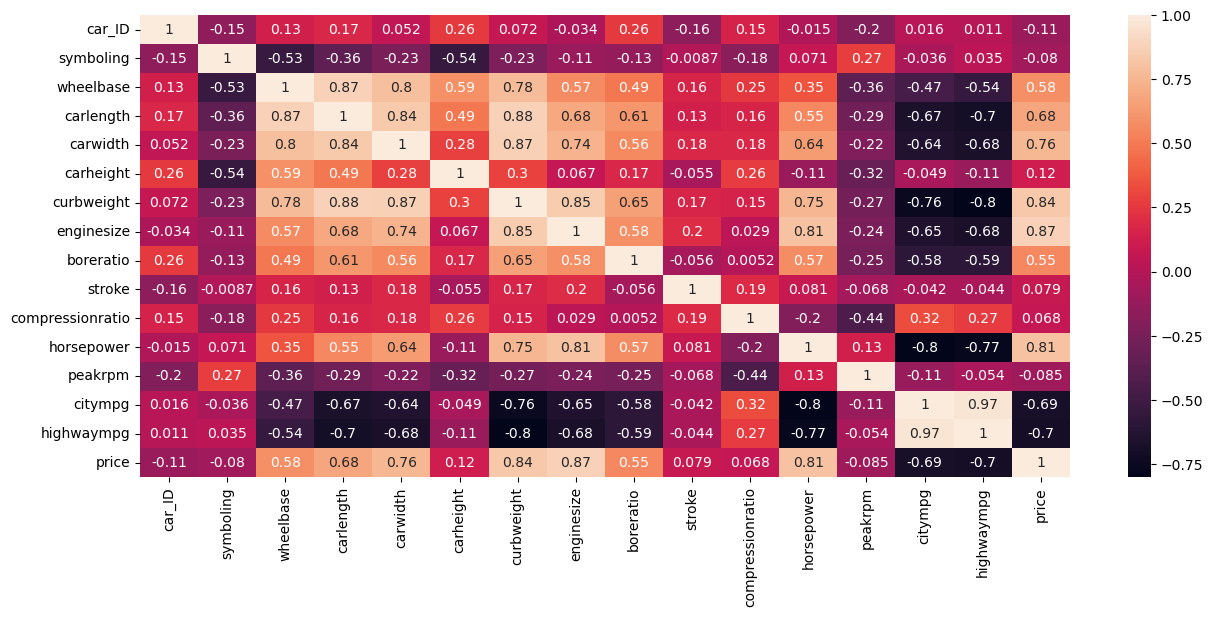

<Figure size 3000x4000 with 0 Axes>

In [279]:
sns.heatmap(df_bm.corr(),annot=True)
plt.figure(figsize=(30,40))
plt.show()

In [ ]:
# failed due to taking more time to give the output

In [300]:
df_bm.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company_Name
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


# RFE Model Building

In [305]:
from sklearn.feature_selection import RFE

In [306]:
lr=LinearRegression()

In [307]:
X1=df_bm.drop(['car_ID','price','CarName'],axis=1)
X1=pd.get_dummies(X1,drop_first=True)
temp_x=sma.add_constant(X1)
y1=df_bm['price']

In [308]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,train_size=0.7,random_state=5)


In [315]:
rfe = RFE(estimator=lr,n_features_to_select=25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [355]:
pd.DataFrame(rfe.ranking_,index=X_train.columns)

,0
symboling,27
wheelbase,40
carlength,38
carwidth,5
carheight,30
...,...
Company_Name_toyouta,1
Company_Name_vokswagen,10
Company_Name_volkswagen,26
Company_Name_volvo,16


In [317]:
feature_index=pd.Series(rfe.ranking_,index=X_train.columns).sort_values(ascending=True)

In [319]:
impfeature_rfe = feature_index[feature_index==1].index
impfeature_rfe

Index(['cylindernumber_twelve', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'enginetype_ohcv', 'Company_Name_alfa-romero', 'Company_Name_bmw',
       'Company_Name_buick', 'Company_Name_honda', 'Company_Name_peugeot',
       'Company_Name_porsche', 'Company_Name_saab', 'Company_Name_subaru',
       'Company_Name_toyouta', 'Company_Name_audi', 'enginelocation_rear',
       'Company_Name_vw', 'boreratio', 'compressionratio', 'fueltype_gas'],
      dtype='object')

In [323]:
rfe_train=X_train.loc[:,impfeature_rfe]
rfe_test=X_test.loc[:,impfeature_rfe]

In [330]:
model_rfe_train=sma.OLS(y_train,rfe_train).fit()
print(model_rfe_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     52.03
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.41e-51
Time:                        23:44:12   Log-Likelihood:                -1309.9
No. Observations:                 143   AIC:                             2670.
Df Residuals:                     118   BIC:                             2744.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cylindernumber_twelve   

In [ ]:
# predict the xtest

In [336]:
pred_test = model_rfe_train.predict(rfe_test)
pred_train = model_rfe_train.predict(rfe_train)

In [337]:
print('The RMSE score RFE test:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('The RMSE score RFE train:',np.sqrt(mean_squared_error(y_train,pred_train)))

The RMSE score RFE test: 1775.1161768544707
The RMSE score RFE train: 5912.996289448747


In [ ]:
# based on the comparsion of rmse train & test the model is under fit

In [ ]:
#Conculsion Calculate RMSE for each model

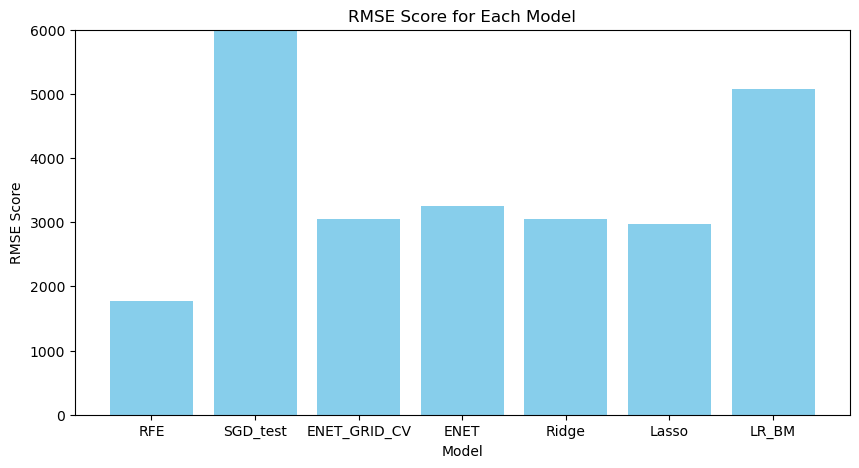

In [354]:
RFE_test = 1775.1161768544707
SGD_test = round(1.3109681937213208e+16,5)
ENET_GRID_CV = 3043.7860949110236
ENET=3247.8319667263045
Ridge=3053.4765316532944
Lasso=2965.5996135487835
LR_BM=5076.637739772069
# List of model names
model_names = ['RFE', 'SGD_test','ENET_GRID_CV','ENET','Ridge','Lasso','LR_BM']

# List of RMSE scores
rmse_scores = [RFE_test,SGD_test,ENET_GRID_CV,ENET,Ridge,Lasso,LR_BM]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('RMSE Score for Each Model')
plt.xlabel('Model')
plt.ylabel('RMSE Score')
plt.ylim(0,6000)
plt.show()